In [1]:
#pns-2019.csv é o arquivo bruto de microdados da PNS 2019 do IBGE, contendo todas as respostas individuais codificadas, mais 
#de 3.000 variáveis, e que só pode ser interpretado corretamente usando o dicionário oficial.

#Variavéis escolhidas:

#Código	Descrição resumida 
#Q092	Depressão e atendimento psicológico   – TARGET
#C008	Idade
#C009	Cor ou raça
#D00301	Escolaridade 
#C011	Estado civil
#P00104	Peso corporal
#P00404	Altura
#Q018013 Prática de atividade física
#P027	Consumo de álcool
#P050	Tabagismo e frequência
#V02701	Nos últimos doze meses, alguém: tocou, manipulou, beijou ou expôs partes do seu corpo contra sua vontade
#V02702 Nos últimos doze meses, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?
#V02801 E alguma vez na vida, alguém: tocou, manipulou, beijou ou expôs partes do seu corpo contra sua vontade
#V02802 E alguma vez na vida, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?
#V029   Nos últimos doze meses, quantas vezes isso aconteceu?
#V032   Quem fez isso com você
#V033   Onde isso ocorreu?
#V034    Nos últimos doze meses, você deixou de realizar quaisquer de suas atividades habituais (trabalhar, realizar afazeres domésticos, ir à escola etc.) por causa desse ato
#V03501 Esse(s) ato(s) sexual(is) forçado(s) gerou(aram) alguma consequência para sua saúde, tais como: Hematomas, cortes, fraturas, queimaduras ou outras lesões físicas ou ferimentos? 
#V03502 Esse(s) ato(s) sexual(is) forçado(s) gerou(aram) alguma consequência para sua saúde, tais como: Medo, tristeza, desânimo, dificuldade para dormir, ansiedade, depressão ou outras consequências psicológicas? 
#V03503 Esse(s) ato(s) sexual(is) forçado(s) gerou(aram) alguma consequência para sua saúde, tais como: Doença sexualmente transmissível ou gravidez indesejada?


#Registros filtrados (Mulheres): 144.940 registros


In [2]:
import pandas as pd #Pandas para manipulação e análise de dados.
import numpy as np  #NumPy para operações numéricas.
import math # Biblioteca padrão do Python que fornece funções matemáticas básicas
import matplotlib.pyplot as plt #Matplotlib para visualização de dados.
%matplotlib inline 
import seaborn as sns #Seaborn para visualização de dados estatísticos.


In [3]:
# Ler/Importar Dataset
df = pd.read_csv('pns-2019_saude_mulher_filtrado.csv')

In [4]:
#ANÁLISE EXPLORATÓRIA
#Visualizando dados, 10 linhas 
df.head(20)

,Q092,C008,C009,D00301,C011,P00104,P00404,Q018013,P027,P050,...,V02702,V02801,V02802,V029,V032,V033,V034,V03501,V03502,V03503
0,1.0,55.0,1.0,NaN,1.0,60.0,145.0,1.0,2.0,3.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,6.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,33.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,15.0,4.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,19.0,4.0,NaN,4.0,65.0,152.0,NaN,2.0,1.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,45.0,2.0,NaN,4.0,77.0,155.0,NaN,3.0,3.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,78.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,25.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,26.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144940 entries, 0 to 144939
Data columns (total 21 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Q092     48047 non-null   float64
 1   C008     144940 non-null  float64
 2   C009     144940 non-null  float64
 3   D00301   39759 non-null   float64
 4   C011     126741 non-null  float64
 5   P00104   47155 non-null   float64
 6   P00404   47155 non-null   float64
 7   Q018013  11405 non-null   float64
 8   P027     48047 non-null   float64
 9   P050     48047 non-null   float64
 10  V02701   46869 non-null   float64
 11  V02702   46869 non-null   float64
 12  V02801   46386 non-null   float64
 13  V02802   46386 non-null   float64
 14  V029     483 non-null     float64
 15  V032     483 non-null     float64
 16  V033     483 non-null     float64
 17  V034     8753 non-null    float64
 18  V03501   2139 non-null    float64
 19  V03502   8753 non-null    float64
 20  V03503   483 non-null     

In [6]:
# =============================
# DEFINIÇÃO DOS MAPAS DE CÓDIGOS
# =============================

map_sim_nao = {1: 1, 2: 0, 9:0}

map_raca = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indigena",
    9: "Ignorado"
}

mapa_escolaridade = {
    1: "Creche",
    2: "Pré-escola",
    3: "Alfabetização de jovens e adultos",
    4: "Regular do ensino fundamental",
    5: "EJA do ensino fundamental",
    6: "Regular do ensino médio",
    7: "EJA do ensino médio",
    8: "Superior - graduação",
    9: "Especialização (mín. 360h)",
    10: "Mestrado",
    11: "Doutorado",
    99: "Ignorado"
}


map_estado_civil = {
    1: "Casada",
    2: "Divorciada",
    3: "Viúva",
    4: "Solteira",
    9: "Ignorado"
}


map_alcool = {
    1: "Nao bebe",
    2: "Menos de uma vez por mês",
    3: "Uma ou mais vezes por mês",
    9: "Ignorado"
}

map_tabaco = {
    1: "Sim",
    2: "Sim",
    3: "Não",
    9: "Ignorado"
}

map_violencia_quem_fez = {
    1:	"Cônjuge ou companheiro (a)",
    2:	"Ex-Cônjuge ou ex-companheiro (a)",
    3:	"Parceiro (a), namorado (a), ex-parceiro (a), ex-namorado (a)",
    4:	"Pai, mãe, padrasto ou madrasta",
    5:	"Filho(a), enteado(a)",
    6:	"Irmão(ã)",
    7:	"Outro parente",
    8:	"Amigo(a)/colega, vizinho(a)",
    9:	"Empregado (a) em geral ",
    10:	"Patrão/patroa/chefe",
    11:	"Pessoa desconhecida",
    12:	"Policial",
    13:	"Outro"
 }

map_violencia_onde = {
    1:	"Residência",
    2:	"Trabalho",
    3:	"Escola, faculdade ou outro estabelecimento de ensino",
    4:	"Bar, restaurante ou similar",
    5:	"Via pública ou outro local público",
    6:	"Outro" 
}


# =============================
# RECODIFICANDO VARIÁVEIS
# =============================

df["Idade"] = df["C008"]
df["Cor_Raca"] = df["C009"].map(map_raca)
df["Cor_Raca"] = df["Cor_Raca"].fillna("Não aplicável")
df["Escolaridade"] = df["D00301"].map(mapa_escolaridade)
df["Escolaridade"] = df["Escolaridade"].fillna("Não aplicável")
df["Estado_Civil"] = df["C011"].map(map_estado_civil)
df["Estado_Civil"] = df["Estado_Civil"].fillna("Não aplicável")
df["Quem_Fez_Violencia"] = df["V032"].map(map_violencia_quem_fez)
df["Onde_Ocorreu_Violencia"] = df["V033"].map(map_violencia_onde)


df["Peso"] = df["P00104"]  #Em kg
df["Altura"] = df["P00404"] # Em cm
df["IMC"] = df["Peso"] / ((df["Altura"] / 100)**2)

def classificar_imc(imc):
    if imc < 18.5:
        return "Abaixo do peso"
    elif imc < 25:
        return "Peso normal"
    elif imc < 30:
        return "Sobrepeso"
    else:
        return "Obesidade"

df["Classificacao_IMC"] = df["IMC"].apply(classificar_imc)
df["Consumo_Alcool"] = df["P027"].map(map_alcool)
df["Tabagismo"] = df["P050"].map(map_tabaco)
df["Violencia_Qtd"] = df["V029"]  


binarias = {
    "Q092": "Depressao",
    "Q018013": "Atividade_Fisica",
    "V02701": "Toque_Sexual_12meses",
    "V02702": "Forcou_RelSexual_12meses",
    "V02801": "Toque_Sexual_Vida",
    "V02802": "Forcou_RelSexual_Vida",
    "V034" : "Prejuizo_Violencia_Sexual" ,
    "V03501": "Consequencia_lesoes",
    "V03502": "Consequencia_psicologicas",
    "V03503": "Consequencia_DST_Gravidez"
}

for col, newcol in binarias.items():
    df[newcol] = df[col].map(map_sim_nao)

# Remover colunas pelos índices (0 a 20)
df = df.drop(df.columns[0:21], axis=1)

df.to_csv("pns2019_mulheres_transformado.csv", index=False)

print("Arquivo gerado com sucesso!")


Arquivo gerado com sucesso!


In [7]:
#ANÁLISE EXPLORATÓRIA
#Visualizando dados, 10 linhas 
df.head(20)

,Idade,Cor_Raca,Escolaridade,Estado_Civil,Quem_Fez_Violencia,Onde_Ocorreu_Violencia,Peso,Altura,IMC,Classificacao_IMC,...,Depressao,Atividade_Fisica,Toque_Sexual_12meses,Forcou_RelSexual_12meses,Toque_Sexual_Vida,Forcou_RelSexual_Vida,Prejuizo_Violencia_Sexual,Consequencia_lesoes,Consequencia_psicologicas,Consequencia_DST_Gravidez
0,55.0,Branca,Não aplicável,Casada,NaN,NaN,60.0,145.0,28.537455,Sobrepeso,...,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,6.0,Parda,Pré-escola,Não aplicável,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,Preta,Creche,Não aplicável,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.0,Branca,Não aplicável,Solteira,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,Parda,Regular do ensino médio,Solteira,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19.0,Parda,Não aplicável,Solteira,NaN,NaN,65.0,152.0,28.133657,Sobrepeso,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,45.0,Preta,Não aplicável,Solteira,NaN,NaN,77.0,155.0,32.049948,Obesidade,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,78.0,Parda,Não aplicável,Solteira,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,25.0,Parda,Não aplicável,Solteira,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,26.0,Parda,Não aplicável,Solteira,NaN,NaN,NaN,NaN,NaN,Obesidade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144940 entries, 0 to 144939
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Idade                      144940 non-null  float64
 1   Cor_Raca                   144940 non-null  object 
 2   Escolaridade               144940 non-null  object 
 3   Estado_Civil               144940 non-null  object 
 4   Quem_Fez_Violencia         483 non-null     object 
 5   Onde_Ocorreu_Violencia     483 non-null     object 
 6   Peso                       47155 non-null   float64
 7   Altura                     47155 non-null   float64
 8   IMC                        47155 non-null   float64
 9   Classificacao_IMC          144940 non-null  object 
 10  Consumo_Alcool             48047 non-null   object 
 11  Tabagismo                  48047 non-null   object 
 12  Violencia_Qtd              483 non-null     float64
 13  Depressao                  48

In [9]:
# ================================
# 2. LISTA DAS VARIÁVEIS
# ================================
categoricas = [
    "Cor_Raca", "Estado_Civil", "Quem_Fez_Violencia",
    "Tabagismo", "Escolaridade","Onde_Ocorreu_Violencia",
    "Classificacao_IMC", "Consumo_Alcool" 
]

numericas_continuas = [
    "Idade", "Peso", "Altura",
    "IMC", "Violencia_Qtd"
]

numericas_binarias = [
    "Atividade_Fisica",
    "Toque_Sexual_12meses",
    "Forcou_RelSexual_12meses",
    "Toque_Sexual_Vida",
    "Forcou_RelSexual_Vida",
    "Prejuizo_Violencia_Sexual" ,
    "Consequencia_lesoes",
    "Consequencia_psicologicas",
    "Consequencia_DST_Gravidez"
]

target = ["Depressao"]

print("\nVariáveis numéricas binárias:", numericas_binarias)
print("\nVariáveis numéricas contínuas:", numericas_continuas)
print("\nVariáveis categóricas:", categoricas)
print("\nVariável target:", target)

# ===============================================
# 3. TRATAMENTO DE VALORES AUSENTES
# ===============================================


# 3.1 Preencher contínuas com mediana
for col in numericas_continuas:
    df[col] = df[col].fillna(df[col].median())

for col in numericas_binarias:
    df[col] = df[col].fillna(0)

# 3.2 Preencher categóricas com "Desconhecido"
for col in categoricas:
    df[col] = df[col].fillna("Desconhecido")

# 3.3 TARGET: NA vira 0 (sem depressão)
df[target] = df[target].fillna(0)

# ===============================================
# 4 SALVAR ARQUIVO FINAL
# ===============================================

df.to_csv("pns-2019_saude_mulher_tratado.csv", index=False)

print("Arquivo gerado com sucesso: pns-2019_saude_mulher_tratado.csv")



Variáveis numéricas binárias: ['Atividade_Fisica', 'Toque_Sexual_12meses', 'Forcou_RelSexual_12meses', 'Toque_Sexual_Vida', 'Forcou_RelSexual_Vida', 'Prejuizo_Violencia_Sexual', 'Consequencia_lesoes', 'Consequencia_psicologicas', 'Consequencia_DST_Gravidez']

Variáveis numéricas contínuas: ['Idade', 'Peso', 'Altura', 'IMC', 'Violencia_Qtd']

Variáveis categóricas: ['Cor_Raca', 'Estado_Civil', 'Quem_Fez_Violencia', 'Tabagismo', 'Escolaridade', 'Onde_Ocorreu_Violencia', 'Classificacao_IMC', 'Consumo_Alcool']

Variável target: ['Depressao']
Arquivo gerado com sucesso: pns-2019_saude_mulher_tratado.csv


In [10]:
#ANÁLISE EXPLORATÓRIA
#Visualizando dados, 10 linhas 
df.head(20)

,Idade,Cor_Raca,Escolaridade,Estado_Civil,Quem_Fez_Violencia,Onde_Ocorreu_Violencia,Peso,Altura,IMC,Classificacao_IMC,...,Depressao,Atividade_Fisica,Toque_Sexual_12meses,Forcou_RelSexual_12meses,Toque_Sexual_Vida,Forcou_RelSexual_Vida,Prejuizo_Violencia_Sexual,Consequencia_lesoes,Consequencia_psicologicas,Consequencia_DST_Gravidez
0,55.0,Branca,Não aplicável,Casada,Desconhecido,Desconhecido,60.0,145.0,28.537455,Sobrepeso,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,Parda,Pré-escola,Não aplicável,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,Preta,Creche,Não aplicável,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,Branca,Não aplicável,Solteira,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,Parda,Regular do ensino médio,Solteira,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,19.0,Parda,Não aplicável,Solteira,Desconhecido,Desconhecido,65.0,152.0,28.133657,Sobrepeso,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,45.0,Preta,Não aplicável,Solteira,Desconhecido,Desconhecido,77.0,155.0,32.049948,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,78.0,Parda,Não aplicável,Solteira,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25.0,Parda,Não aplicável,Solteira,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,26.0,Parda,Não aplicável,Solteira,Desconhecido,Desconhecido,65.0,160.0,25.806452,Obesidade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144940 entries, 0 to 144939
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Idade                      144940 non-null  float64
 1   Cor_Raca                   144940 non-null  object 
 2   Escolaridade               144940 non-null  object 
 3   Estado_Civil               144940 non-null  object 
 4   Quem_Fez_Violencia         144940 non-null  object 
 5   Onde_Ocorreu_Violencia     144940 non-null  object 
 6   Peso                       144940 non-null  float64
 7   Altura                     144940 non-null  float64
 8   IMC                        144940 non-null  float64
 9   Classificacao_IMC          144940 non-null  object 
 10  Consumo_Alcool             144940 non-null  object 
 11  Tabagismo                  144940 non-null  object 
 12  Violencia_Qtd              144940 non-null  float64
 13  Depressao                  14

In [12]:
# Dados duplicados
print("Duplicadas:", df.duplicated().sum())
print("Únicas:", len(df) - df.duplicated().sum())

Duplicadas: 95087
Únicas: 49853


In [13]:
#Verifica dados nulos
# Não existe valores ausentes no conjunto de dados, pois cada coluna possui 303 entradas não nulas.

df.isnull().sum()

Idade                        0
Cor_Raca                     0
Escolaridade                 0
Estado_Civil                 0
Quem_Fez_Violencia           0
Onde_Ocorreu_Violencia       0
Peso                         0
Altura                       0
IMC                          0
Classificacao_IMC            0
Consumo_Alcool               0
Tabagismo                    0
Violencia_Qtd                0
Depressao                    0
Atividade_Fisica             0
Toque_Sexual_12meses         0
Forcou_RelSexual_12meses     0
Toque_Sexual_Vida            0
Forcou_RelSexual_Vida        0
Prejuizo_Violencia_Sexual    0
Consequencia_lesoes          0
Consequencia_psicologicas    0
Consequencia_DST_Gravidez    0
dtype: int64

In [14]:
df[target].value_counts()

Depressao
0.0          138562
1.0            6378
Name: count, dtype: int64

In [15]:
df['Cor_Raca'].value_counts()

Cor_Raca
Parda       76547
Branca      52290
Preta       14105
Indigena     1053
Amarela       937
Ignorado        8
Name: count, dtype: int64

In [16]:
df['Estado_Civil'].value_counts()

Estado_Civil
Solteira         66623
Casada           42142
Não aplicável    18199
Viúva            10215
Divorciada        7761
Name: count, dtype: int64

In [17]:
df['Consumo_Alcool'].value_counts()

Consumo_Alcool
Desconhecido                 96893
Nao bebe                     34217
Uma ou mais vezes por mês     8470
Menos de uma vez por mês      5360
Name: count, dtype: int64

In [18]:
df['Tabagismo'].value_counts()

Tabagismo
Desconhecido    96893
Não             43539
Sim              4508
Name: count, dtype: int64

In [19]:
df['Escolaridade'].value_counts()

Escolaridade
Não aplicável                        105181
Regular do ensino fundamental         19197
Superior - graduação                   6547
Regular do ensino médio                6119
Pré-escola                             3384
Creche                                 2091
Especialização (mín. 360h)             1104
EJA do ensino médio                     470
EJA do ensino fundamental               466
Mestrado                                190
Alfabetização de jovens e adultos       105
Doutorado                                86
Name: count, dtype: int64

In [20]:
df['Idade'].value_counts()

Idade
37.0     2311
18.0     2306
36.0     2284
19.0     2249
38.0     2247
         ... 
103.0       3
106.0       3
107.0       2
105.0       1
112.0       1
Name: count, Length: 109, dtype: int64

In [21]:
df['Peso'].value_counts()

Peso
65.0     99853
60.0      1993
62.0      1917
70.0      1768
68.0      1638
         ...  
25.0         1
133.0        1
131.0        1
150.0        1
134.0        1
Name: count, Length: 114, dtype: int64

In [22]:
df['Altura'].value_counts()

Altura
160.0    102679
165.0      3626
155.0      3233
162.0      2494
150.0      2470
          ...  
131.0         1
128.0         1
190.0         1
129.0         1
195.0         1
Name: count, Length: 63, dtype: int64

In [23]:
df['Atividade_Fisica'].value_counts()

Atividade_Fisica
0.0    135572
1.0      9368
Name: count, dtype: int64

In [24]:
df['IMC'].value_counts()

IMC
25.806452    97904
23.437500      252
25.390625      235
27.343750      208
24.218750      206
             ...  
45.359905        1
26.840610        1
28.088991        1
18.845467        1
37.858302        1
Name: count, Length: 2889, dtype: int64

In [25]:
df['Classificacao_IMC'].value_counts()

Classificacao_IMC
Obesidade         108203
Peso normal        19189
Sobrepeso          16135
Abaixo do peso      1413
Name: count, dtype: int64

In [26]:
df['Quem_Fez_Violencia'].value_counts()

Quem_Fez_Violencia
Desconhecido                                                    144457
Ex-Cônjuge ou ex-companheiro (a)                                   107
Pessoa desconhecida                                                 98
Cônjuge ou companheiro (a)                                          89
Amigo(a)/colega, vizinho(a)                                         76
Parceiro (a), namorado (a), ex-parceiro (a), ex-namorado (a)        48
Outro parente                                                       27
Outro                                                               13
Patrão/patroa/chefe                                                 11
Pai, mãe, padrasto ou madrasta                                       7
Policial                                                             2
Filho(a), enteado(a)                                                 2
Empregado (a) em geral                                               2
Irmão(ã)                                                  

In [27]:
df['Onde_Ocorreu_Violencia'].value_counts()

Onde_Ocorreu_Violencia
Desconhecido                                            144457
Residência                                                 294
Via pública ou outro local público                          95
Outro                                                       29
Bar, restaurante ou similar                                 28
Trabalho                                                    26
Escola, faculdade ou outro estabelecimento de ensino        11
Name: count, dtype: int64

In [28]:
df['Violencia_Qtd'].value_counts()

Violencia_Qtd
2.0    144655
3.0       217
1.0        68
Name: count, dtype: int64

In [29]:
df['Toque_Sexual_12meses'].value_counts()

Toque_Sexual_12meses
0.0    144554
1.0       386
Name: count, dtype: int64

In [30]:
df['Forcou_RelSexual_12meses'].value_counts()

Forcou_RelSexual_12meses
0.0    144673
1.0       267
Name: count, dtype: int64

In [31]:
df['Toque_Sexual_Vida'].value_counts()

Toque_Sexual_Vida
0.0    141801
1.0      3139
Name: count, dtype: int64

In [32]:
df['Forcou_RelSexual_Vida'].value_counts()

Forcou_RelSexual_Vida
0.0    142618
1.0      2322
Name: count, dtype: int64

In [33]:
df['Prejuizo_Violencia_Sexual'].value_counts()

Prejuizo_Violencia_Sexual
0.0    143460
1.0      1480
Name: count, dtype: int64

In [34]:
df['Consequencia_lesoes'].value_counts()

Consequencia_lesoes
0.0    144236
1.0       704
Name: count, dtype: int64

In [35]:
df['Consequencia_psicologicas'].value_counts()

Consequencia_psicologicas
0.0    139871
1.0      5069
Name: count, dtype: int64

In [36]:
df['Consequencia_DST_Gravidez'].value_counts()

Consequencia_DST_Gravidez
0.0    144911
1.0        29
Name: count, dtype: int64

In [37]:
#Gera um resumo estatístico
#count → número de valores não nulos
#mean → média
#std → desvio padrão
#min → valor mínimo
#25% → primeiro quartil (Q1)
#50% → mediana (Q2)
#75% → terceiro quartil (Q3)
#max → valor máximo
df.describe()

,Idade,Peso,Altura,IMC,Violencia_Qtd,Depressao,Atividade_Fisica,Toque_Sexual_12meses,Forcou_RelSexual_12meses,Toque_Sexual_Vida,Forcou_RelSexual_Vida,Prejuizo_Violencia_Sexual,Consequencia_lesoes,Consequencia_psicologicas,Consequencia_DST_Gravidez
count,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000,144940.000000
mean,36.269863,65.719291,159.760115,26.032195,2.001028,0.044004,0.064634,0.002663,0.001842,0.021657,0.016020,0.010211,0.004857,0.034973,0.000200
std,21.914266,7.911840,4.233428,2.946579,0.044332,0.205106,0.245879,0.051537,0.042881,0.145562,0.125554,0.100533,0.069524,0.183712,0.014144
min,0.000000,25.000000,128.000000,11.111111,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,65.000000,160.000000,25.806452,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,65.000000,160.000000,25.806452,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,65.000000,160.000000,25.806452,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,150.000000,195.000000,56.923596,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


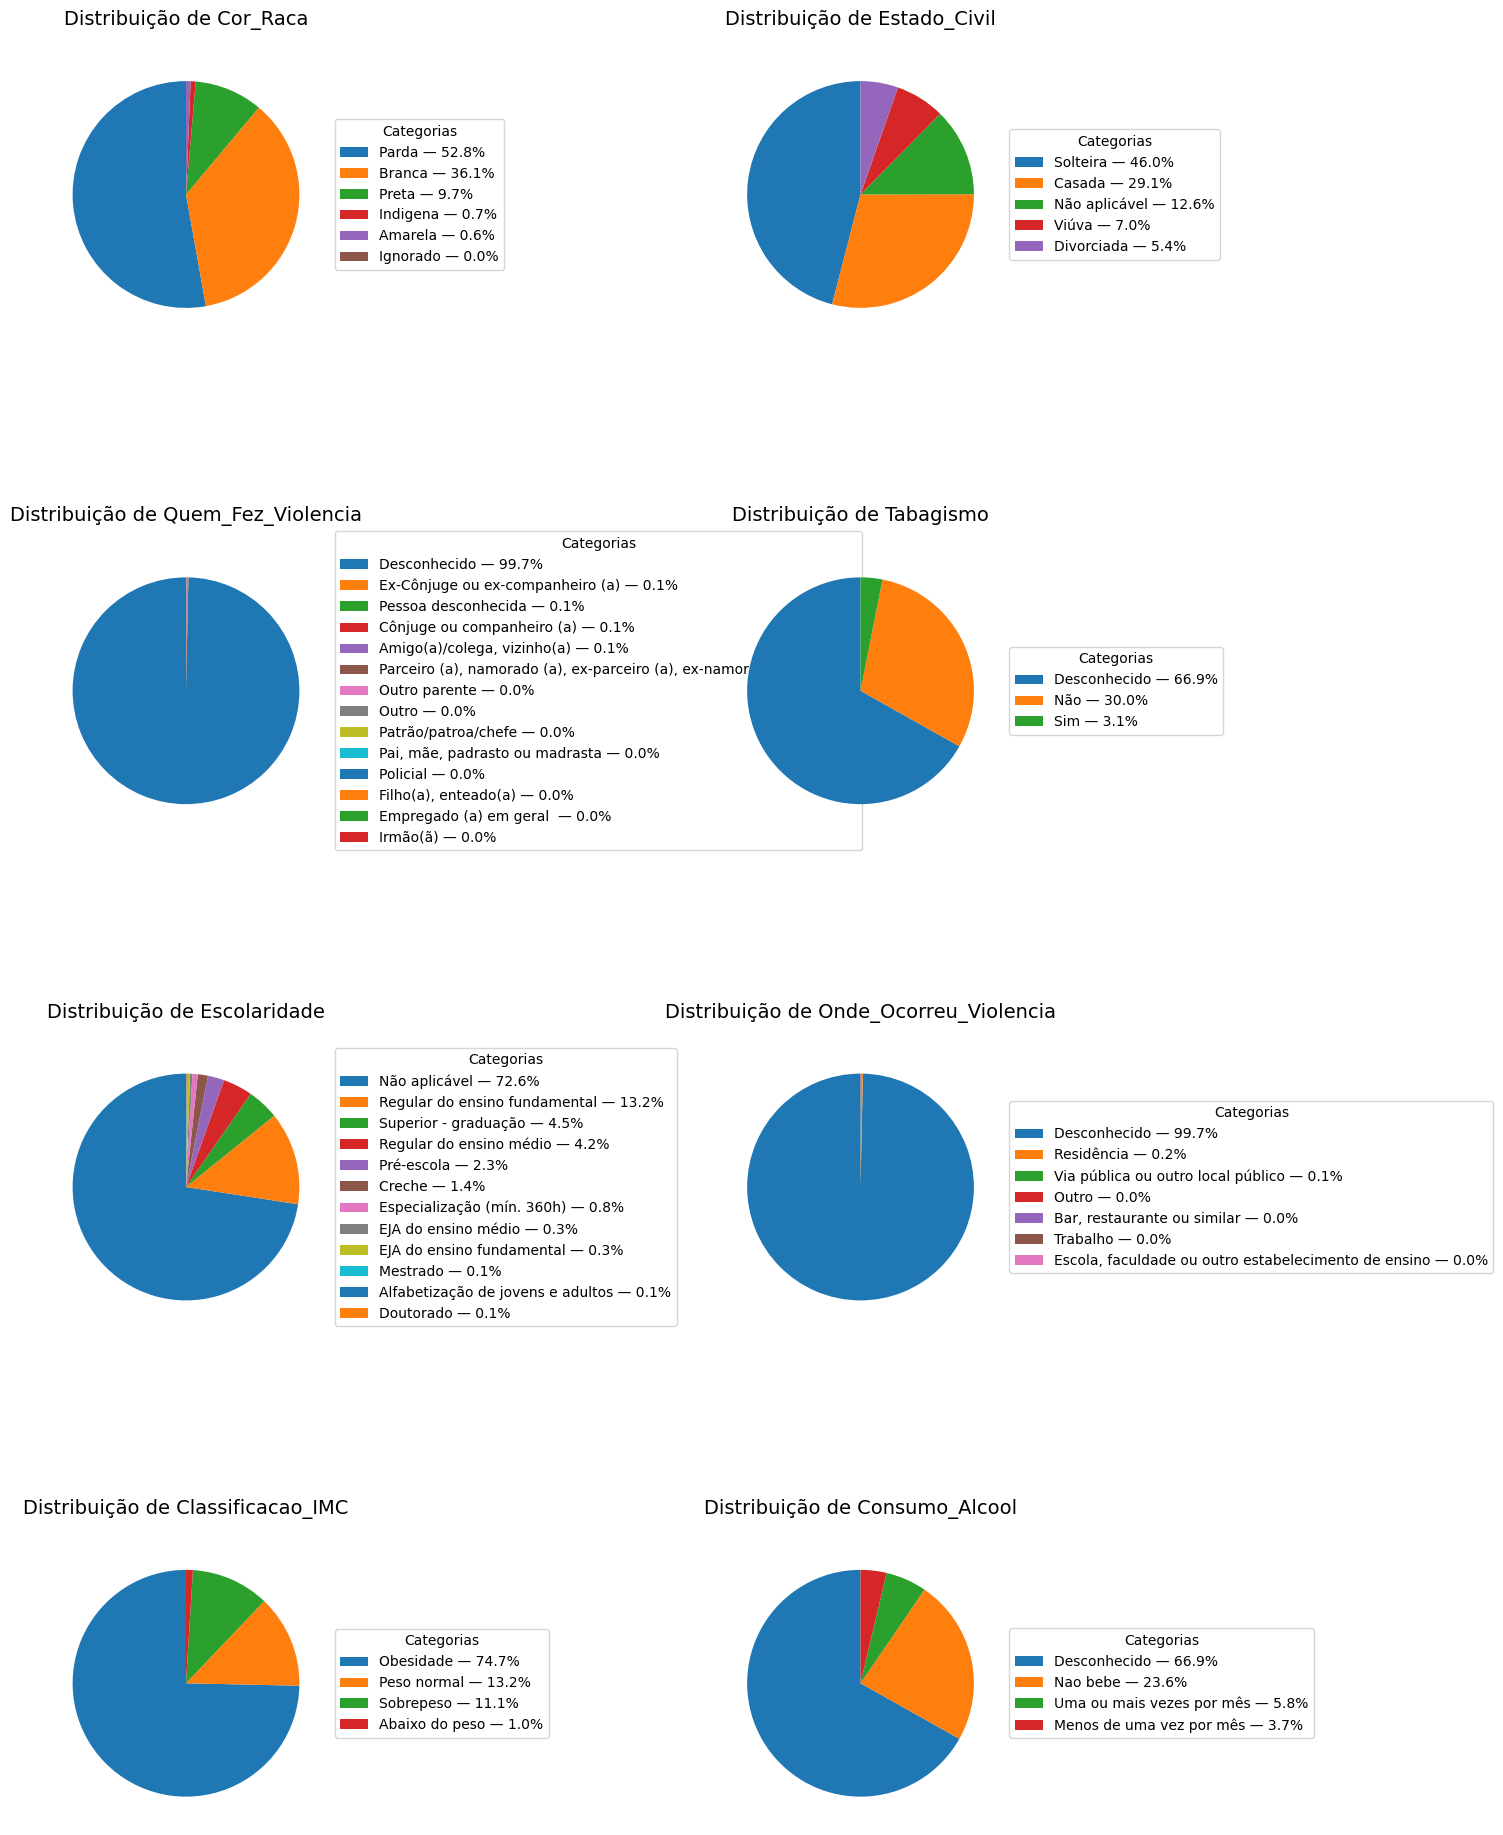

In [38]:
# Configurar layout: 2 gráficos por linha
cols = 2
rows = (len(categoricas) + 1) // cols

plt.figure(figsize=(14, 5 * rows))

for i, var in enumerate(categoricas, 1):
    
    # Frequências
    counts = df[var].value_counts()
    labels = [f"{cat} — {perc:.1f}%" for cat, perc in 
              zip(counts.index, counts.values / counts.values.sum() * 100)]
    
    # Criar gráfico de pizza
    ax = plt.subplot(rows, cols, i)
    wedges, texts = ax.pie(counts.values, startangle=90)
    
    # Título bem posicionado
    ax.set_title(f"Distribuição de {var}", fontsize=14, pad=20)
    
    # Legenda colocada FORA do gráfico
    ax.legend(
        wedges, 
        labels, 
        title="Categorias",
        loc="center left", 
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

# Ajuste geral de layout
plt.tight_layout()
plt.show()



📊 Estatísticas de Idade:
   Média:     36.27
   Mediana:   35.00
   Desvio P.: 21.91
   Valores nulos: 0


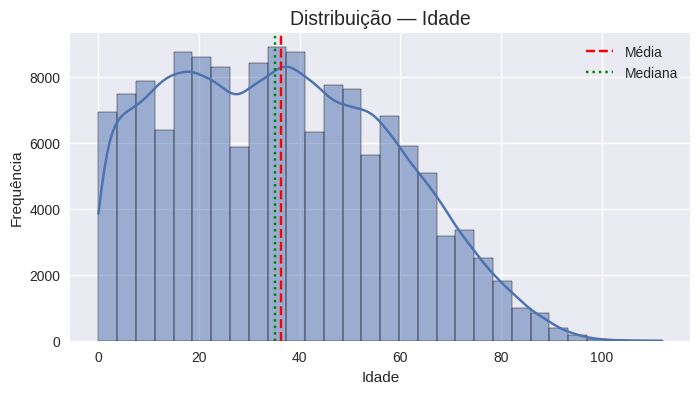


📊 Estatísticas de Peso:
   Média:     65.72
   Mediana:   65.00
   Desvio P.: 7.91
   Valores nulos: 0


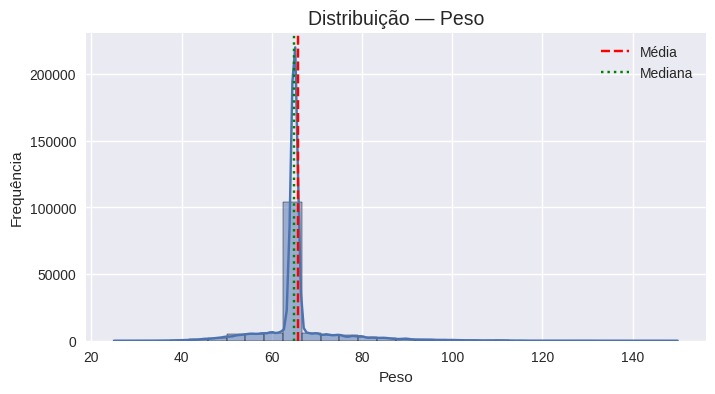


📊 Estatísticas de Altura:
   Média:     159.76
   Mediana:   160.00
   Desvio P.: 4.23
   Valores nulos: 0


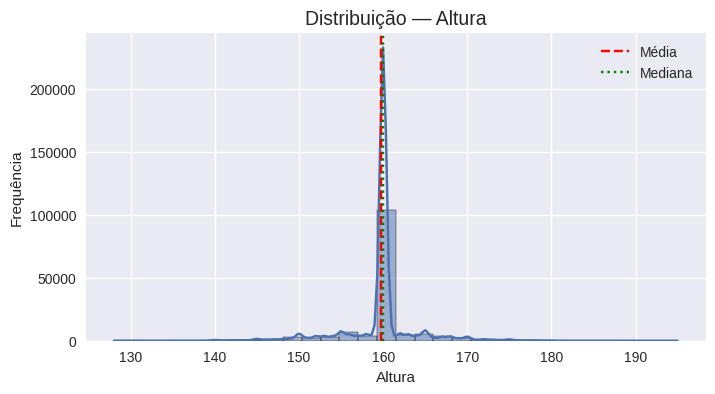


📊 Estatísticas de IMC:
   Média:     26.03
   Mediana:   25.81
   Desvio P.: 2.95
   Valores nulos: 0


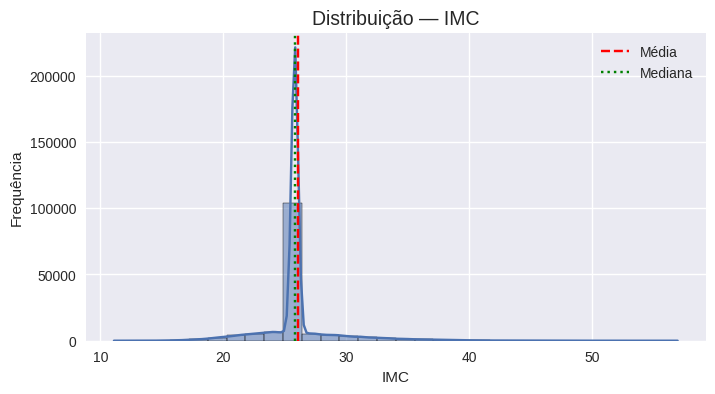


📊 Estatísticas de Violencia_Qtd:
   Média:     2.00
   Mediana:   2.00
   Desvio P.: 0.04
   Valores nulos: 0


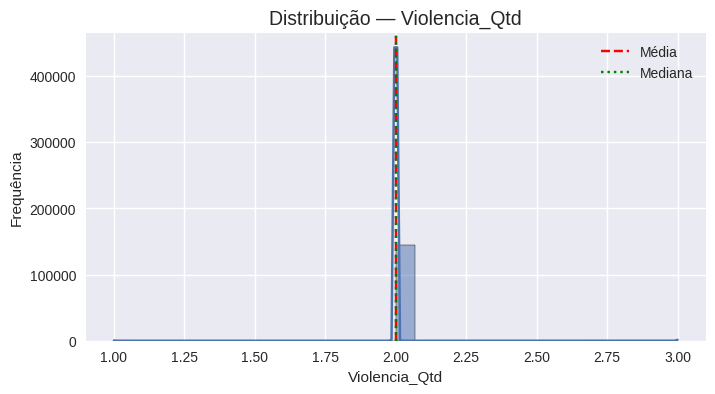

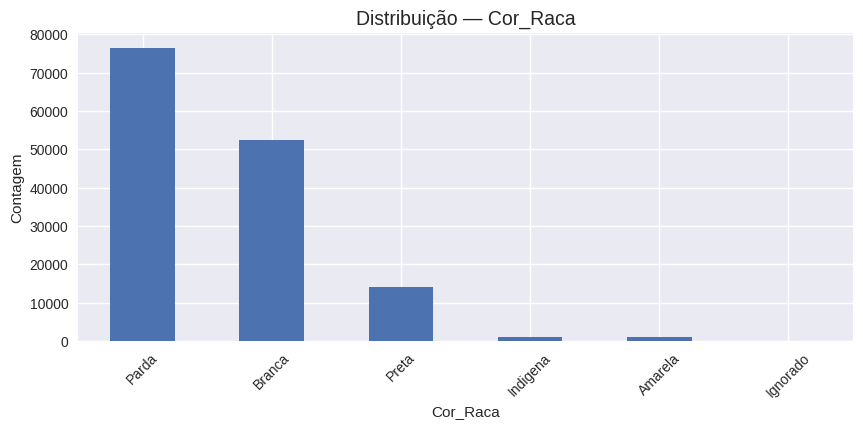


📊 Frequência — Cor_Raca:
Cor_Raca
Parda       76547
Branca      52290
Preta       14105
Indigena     1053
Amarela       937
Ignorado        8
Name: count, dtype: int64




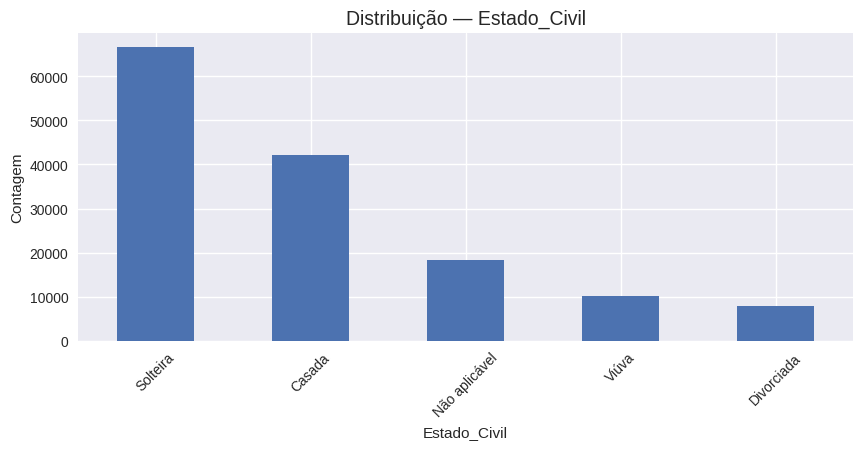


📊 Frequência — Estado_Civil:
Estado_Civil
Solteira         66623
Casada           42142
Não aplicável    18199
Viúva            10215
Divorciada        7761
Name: count, dtype: int64




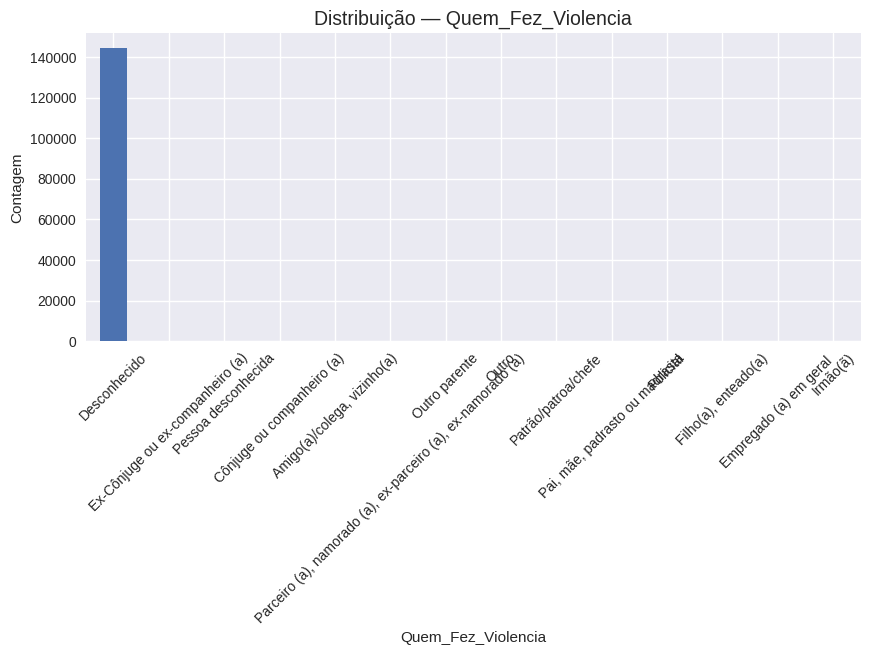


📊 Frequência — Quem_Fez_Violencia:
Quem_Fez_Violencia
Desconhecido                                                    144457
Ex-Cônjuge ou ex-companheiro (a)                                   107
Pessoa desconhecida                                                 98
Cônjuge ou companheiro (a)                                          89
Amigo(a)/colega, vizinho(a)                                         76
Parceiro (a), namorado (a), ex-parceiro (a), ex-namorado (a)        48
Outro parente                                                       27
Outro                                                               13
Patrão/patroa/chefe                                                 11
Pai, mãe, padrasto ou madrasta                                       7
Policial                                                             2
Filho(a), enteado(a)                                                 2
Empregado (a) em geral                                               2
Irmão(ã)              

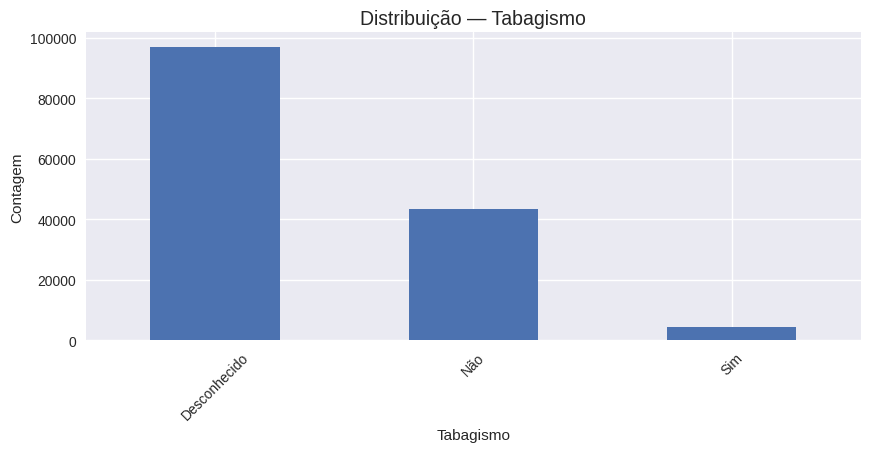


📊 Frequência — Tabagismo:
Tabagismo
Desconhecido    96893
Não             43539
Sim              4508
Name: count, dtype: int64




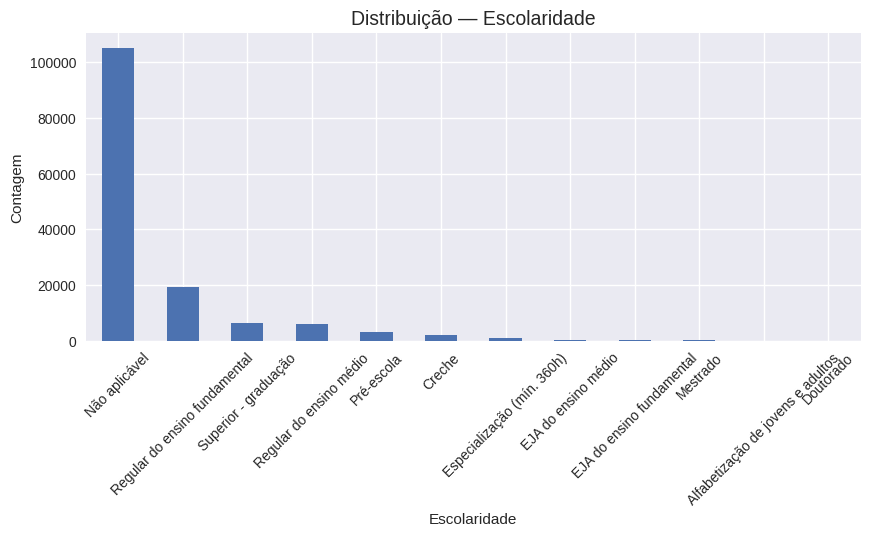


📊 Frequência — Escolaridade:
Escolaridade
Não aplicável                        105181
Regular do ensino fundamental         19197
Superior - graduação                   6547
Regular do ensino médio                6119
Pré-escola                             3384
Creche                                 2091
Especialização (mín. 360h)             1104
EJA do ensino médio                     470
EJA do ensino fundamental               466
Mestrado                                190
Alfabetização de jovens e adultos       105
Doutorado                                86
Name: count, dtype: int64




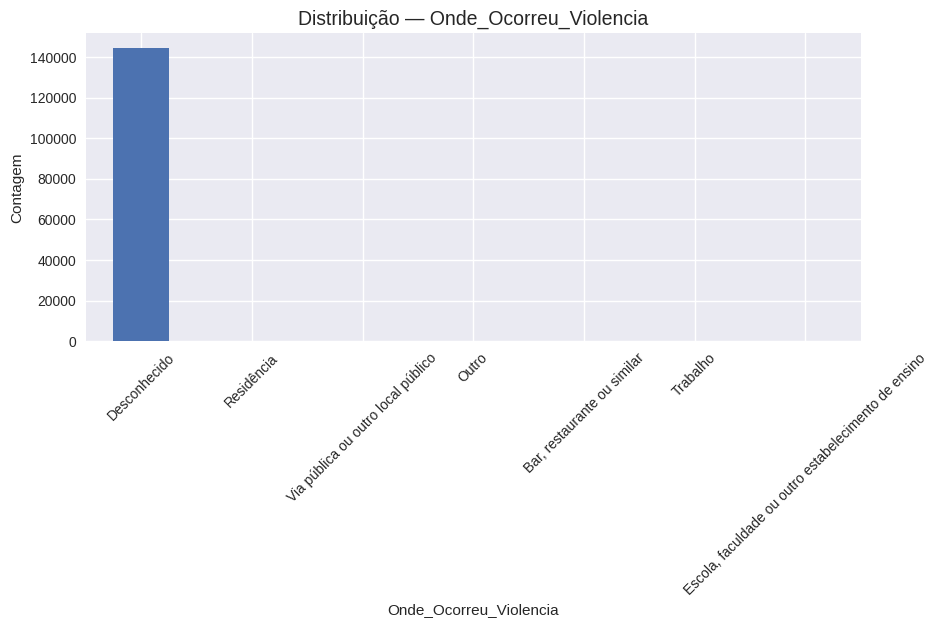


📊 Frequência — Onde_Ocorreu_Violencia:
Onde_Ocorreu_Violencia
Desconhecido                                            144457
Residência                                                 294
Via pública ou outro local público                          95
Outro                                                       29
Bar, restaurante ou similar                                 28
Trabalho                                                    26
Escola, faculdade ou outro estabelecimento de ensino        11
Name: count, dtype: int64




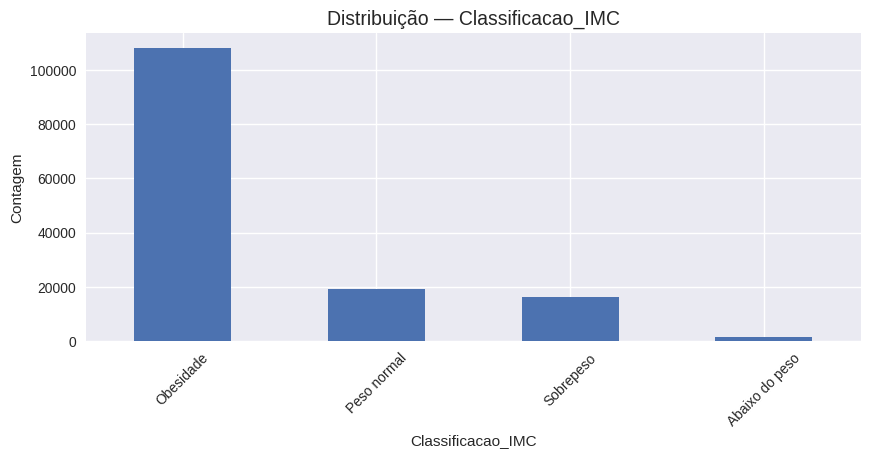


📊 Frequência — Classificacao_IMC:
Classificacao_IMC
Obesidade         108203
Peso normal        19189
Sobrepeso          16135
Abaixo do peso      1413
Name: count, dtype: int64




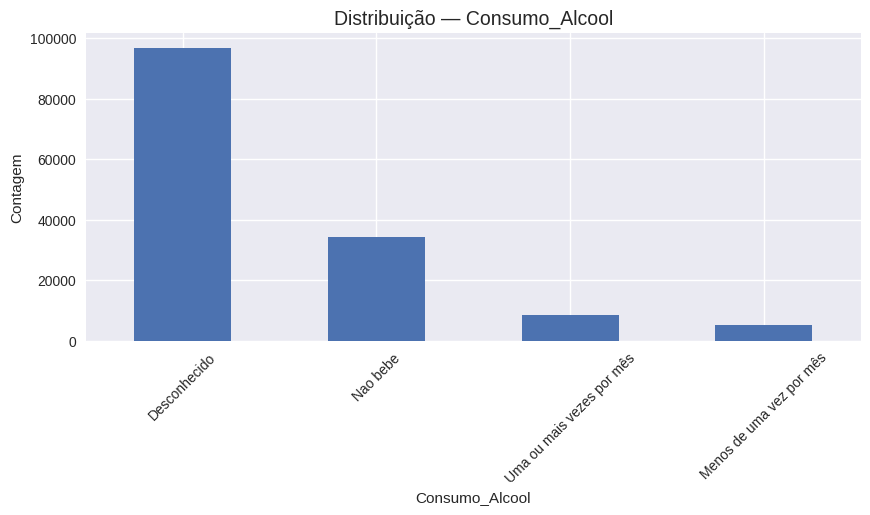


📊 Frequência — Consumo_Alcool:
Consumo_Alcool
Desconhecido                 96893
Nao bebe                     34217
Uma ou mais vezes por mês     8470
Menos de uma vez por mês      5360
Name: count, dtype: int64



✓ ANÁLISE UNIVARIADA FINALIZADA


In [39]:

# ======================================================
#  ANÁLISE UNIVARIADA — VARIÁVEIS NUMÉRICAS
# ======================================================
plt.style.use("seaborn-v0_8")

for col in numericas_continuas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    
    plt.title(f"Distribuição — {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequência")
    
    # Estatísticas
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()

    print(f"\n📊 Estatísticas de {col}:")
    print(f"   Média:     {mean:.2f}")
    print(f"   Mediana:   {median:.2f}")
    print(f"   Desvio P.: {std:.2f}")
    print(f"   Valores nulos: {df[col].isna().sum()}")

    plt.axvline(mean, color='red', linestyle='--', label='Média')
    plt.axvline(median, color='green', linestyle=':', label='Mediana')
    plt.legend()
    plt.show()

# ======================================================
# 4) ANÁLISE UNIVARIADA — VARIÁVEIS CATEGÓRICAS
# ======================================================

for col in categoricas:
    plt.figure(figsize=(10,4))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f"Distribuição — {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n📊 Frequência — {col}:")
    print(df[col].value_counts(dropna=False))
    print("\n")

print("\n✓ ANÁLISE UNIVARIADA FINALIZADA")


In [40]:
#ANÁLISE BIVARIADA COMPLETA (TARGET x TODAS VARIÁVEIS)



In [41]:
df["Depressao"] = df["Depressao"].astype("Int64")

In [42]:
from scipy import stats

resultados_num = []

for var in numericas_continuas:
    grupo_0 = df.loc[df["Depressao"] == 0, var].dropna()
    grupo_1 = df.loc[df["Depressao"] == 1, var].dropna()

    if len(grupo_0) > 10 and len(grupo_1) > 10:
        stat, p = stats.mannwhitneyu(grupo_0, grupo_1, alternative="two-sided")
        resultados_num.append({
            "Variavel": var,
            "Mediana_Sem_Depressao": grupo_0.median(),
            "Mediana_Com_Depressao": grupo_1.median(),
            "p_value": p
        })

df_num = pd.DataFrame(resultados_num).sort_values("p_value")
df_num

#Interpretação

#Variáveis numéricas contínuas × Depressão
#1 - Idade
#Mediana sem depressão: 34 anos
#Mediana com depressão: 50 anos
#p-value < 0.001
# Interpretação:
#Há uma diferença estatisticamente significativa e substantiva. Pessoas com depressão são, em média, mais velhas.
#Isso sugere que a depressão pode estar associada a acúmulo de exposições ao longo da vida, condições crônicas ou eventos traumáticos.
#Relevância: variável forte → deve entrar no modelo multivariado.

#2 -Peso
#Mediana maior no grupo com depressão
#p-value extremamente pequeno
# Interpretação:
#Existe associação estatística, mas a diferença absoluta é pequena (65 vs 67 kg).
#Sozinha, essa variável tem baixo significado clínico, mas pode atuar como confundidora ou mediadora via IMC.
# Usar com cautela; IMC é mais informativo.

#3 -IMC
#Mediana sem depressão: 25,8
#Mediana com depressão: 26,5
#p-value < 0.001
# Interpretação:
#Indivíduos com depressão apresentam IMC discretamente maior, indicando associação entre excesso de peso e depressão.
# A diferença é estatisticamente significativa, mas moderada em magnitude.
#O efeito ganha mais força quando analisado de forma categórica (ver Classificação_IMC).
# Pode entrar como contínuo ou categórico (não ambos juntos).

#4 - Violencia_Qtd
#Mediana igual (2 vs 2)
#p-value extremamente pequeno
# Interpretação:
#Apesar das medianas iguais, a distribuição difere entre os grupos.
#Isso indica que pessoas com depressão tendem a apresentar maior frequência ou recorrência de violência, mesmo que a mediana não capture isso bem.
#Importante manter no modelo.

#5 - Altura
#Medianas iguais
#p-value = 0.34 (não significativo)
# Interpretação:
# Não há associação entre altura e depressão.
# Variável sem relevância analítica nesse contexto.
# Pode ser excluída de modelos explicativos.


,Variavel,Mediana_Sem_Depressao,Mediana_Com_Depressao,p_value
0,Idade,34.000000,50.00000,0.000000e+00
1,Peso,65.000000,67.00000,4.866375e-99
3,IMC,25.806452,26.48554,7.763949e-76
4,Violencia_Qtd,2.000000,2.00000,1.967153e-16
2,Altura,160.000000,160.00000,3.409820e-01


In [43]:
resultados_cat = []

for var in categoricas:
    tabela = pd.crosstab(df[var], df["Depressao"])

    if tabela.shape[0] > 1 and tabela.shape[1] > 1:
        chi2, p, dof, exp = stats.chi2_contingency(tabela)

        resultados_cat.append({
            "Variavel": var,
            "Qui2": chi2,
            "p_value": p
        })

df_cat = pd.DataFrame(resultados_cat).sort_values("p_value")
df_cat

#Interpretação
#p < 0.05 → associação estatística

#1 - Estado civil, escolaridade, cor/raça
# Indicadores de contexto sociodemográfico.
#Sugerem que a depressão está associada a desigualdades sociais estruturais.
# Importantes como variáveis de ajuste.

#2 - Tabagismo e consumo de álcool
#Qui² muito elevados
#p-value < 0.001
# Interpretação:
#Há forte associação entre uso de substâncias e depressão, possivelmente bidirecional:
#depressão → maior consumo
#consumo → agravamento da depressão
# Devem entrar no modelo (cuidado com causalidade reversa).

#3 - Classificação_IMC
#Qui² muito alto
#p-value < 0.001
# Interpretação:
#O risco de depressão varia conforme a categoria nutricional, reforçando que o efeito do IMC é não linear.
# Excelente variável para análise categórica.

#4 - Variáveis de violência (quem fez / onde ocorreu)
#Associações extremamente fortes
# Interpretação:
# A depressão está fortemente associada ao contexto, autor e local da violência, indicando que não é apenas a ocorrência, mas o tipo de violência que importa.
# Muito relevantes para modelos explicativos.

,Variavel,Qui2,p_value
1,Estado_Civil,2677.614770,0.000000e+00
3,Tabagismo,13892.842794,0.000000e+00
6,Classificacao_IMC,8017.571518,0.000000e+00
4,Escolaridade,1577.708250,0.000000e+00
7,Consumo_Alcool,13457.532270,0.000000e+00
2,Quem_Fez_Violencia,919.369912,3.555399e-188
5,Onde_Ocorreu_Violencia,835.625611,3.084726e-177
0,Cor_Raca,225.227862,1.126977e-46


In [44]:
resultados_bin = []

for var in numericas_binarias:
    tabela = pd.crosstab(df[var], df["Depressao"])

    if tabela.shape == (2, 2):
        a, b, c, d = tabela.values.flatten()
        odds_ratio = (a*d) / (b*c) if b*c != 0 else np.nan
        chi2, p, _, _ = stats.chi2_contingency(tabela)

        resultados_bin.append({
            "Variavel": var,
            "Odds_Ratio": odds_ratio,
            "p_value": p
        })

df_bin = pd.DataFrame(resultados_bin).sort_values("p_value")
df_bin

#nterpretação do Odds Ratio
#OR > 1 → maior chance de depressão
#OR < 1 → efeito protetor
#Quanto mais distante de 1, mais forte a associação

#Destaques principais
#Variável	                      Odds Ratio	Interpretação
#Consequencia_DST_Gravidez	          17,7	associação extremamente forte
#Prejuizo_Violencia_Sexual	          12,7	impacto severo
#Forçou relação sexual (vida)          9,8	violência sexual grave
#Toque sexual (vida)                   8,3	exposição cumulativa
#Consequências psicológicas	          10,7	dano emocional direto
#Atividade Física	                    6,5	sedentarismo associado à depressão

#Interpretação geral:
#Indivíduos expostos à violência sexual, especialmente com consequências físicas, psicológicas ou reprodutivas, apresentam probabilidade dramaticamente maior de depressão.

#Esses resultados mostram:
#efeito forte
#coerente
#plausível
#consistente com literatura
#Variáveis prioritárias para qualquer modelo multivariado.

,Variavel,Odds_Ratio,p_value
0,Atividade_Fisica,6.499640,0.000000e+00
3,Toque_Sexual_Vida,8.259686,0.000000e+00
5,Prejuizo_Violencia_Sexual,12.723526,0.000000e+00
4,Forcou_RelSexual_Vida,9.794527,0.000000e+00
7,Consequencia_psicologicas,10.740835,0.000000e+00
6,Consequencia_lesoes,7.650473,8.702548e-165
1,Toque_Sexual_12meses,9.607051,5.303780e-135
2,Forcou_RelSexual_12meses,11.965949,1.178533e-131
8,Consequencia_DST_Gravidez,17.685566,2.907686e-24


In [45]:
#Ranking final de variáveis relevantes
variaveis_significativas = pd.concat([
    df_num[["Variavel", "p_value"]],
    df_cat[["Variavel", "p_value"]],
    df_bin[["Variavel", "p_value"]]
]).sort_values("p_value")

#Bloco 1 — Variáveis estruturalmente centrais
#Essas variáveis aparecem no topo porque:
#têm forte associação
#têm efeito consistente
#fazem sentido teórico
#✔ Idade
#✔ Classificacao_IMC
#✔ Estado_Civil
#✔ Escolaridade
#✔ Tabagismo
#✔ Consumo_Alcool
#✔ Atividade_Fisica
#Interpretação
#Essas variáveis representam contexto de vida, estilo de vida e condição socioeconômica.
#Elas não são eventos pontuais, mas fatores de vulnerabilidade acumulada.
#Devem entrar como bloco de ajuste no modelo multivariado.


#Bloco 2 — Violência sexual ao longo da vida (efeito dominante)
#Essas variáveis aparecem logo depois e dominam a associação:
#✔ Toque_Sexual_Vida
#✔ Forcou_RelSexual_Vida
#✔ Prejuizo_Violencia_Sexual
#✔ Consequencia_psicologicas
#✔ Consequencia_lesoes
#✔ Consequencia_DST_Gravidez
#✔ Toque_Sexual_12meses
#✔ Forcou_RelSexual_12meses
# Interpretação-chave (muito importante):
# essas variáveis não são independentes entre si.
#Elas representam o mesmo fenômeno latente:
#Violência sexual + gravidade + consequências
# O ranking alto não significa que todas devam entrar juntas no modelo.


#Bloco 3 — Contexto da violência
#✔ Quem_Fez_Violencia
#✔ Onde_Ocorreu_Violencia
#✔ Violencia_Qtd
# Interpretação
#Essas variáveis refinam o entendimento da violência:
#autor
#local
#repetição
#Elas explicam nuances, mas não substituem o efeito principal da violência em si.
# Use uma ou duas, não todas.


#Bloco 4 — IMC contínuo vs Peso
#✔ Peso
#✔ IMC
# Interpretação correta
#Peso isolado tem baixo significado clínico
#IMC captura melhor o risco
#Classificacao_IMC é ainda mais interpretável
# Nunca use Peso + IMC + Classificacao_IMC juntos.
# Escolha UM:
#análise epidemiológica → Classificacao_IMC
#análise estatística → IMC

#Bloco 5 — Cor/Raça
#✔ Cor_Raca (p ≪ 0.05)
# Interpretação madura
#Não é variável biológica.
#É marcador de desigualdade estrutural, acesso a serviços, exposição à violência.
# Usar como variável de ajuste, não como “fator causal direto”.

#A única variável claramente irrelevante
# Altura
#p = 0.34
#sem plausibilidade teórica
# Pode ser excluída com segurança.

,Variavel,p_value
0,Idade,0.000000e+00
6,Classificacao_IMC,0.000000e+00
3,Tabagismo,0.000000e+00
1,Estado_Civil,0.000000e+00
0,Atividade_Fisica,0.000000e+00
3,Toque_Sexual_Vida,0.000000e+00
7,Consumo_Alcool,0.000000e+00
4,Escolaridade,0.000000e+00
5,Prejuizo_Violencia_Sexual,0.000000e+00
4,Forcou_RelSexual_Vida,0.000000e+00


In [ ]:
#Ranking “real” de relevância (conceitual)
#Se reorganizarmos por importância analítica, não por p-value:

# Núcleo explicativo
#Violência sexual (vida / consequências)
#Consequências psicológicas
#Idade

# Ajuste estrutural
#Escolaridade
#Estado civil
#Cor/Raça

# Estilo de vida
#Tabagismo
#Consumo de álcool
#Atividade física

# Condição corporal
#Classificação_IMC ou IMC

#Conclusão técnica
#A análise bivariada identificou associações estatisticamente significativas entre depressão e variáveis sociodemográficas, 
#comportamentais, antropométricas e, sobretudo, relacionadas à violência sexual. Observou-se que fatores estruturais (idade, 
#escolaridade, estado civil), estilo de vida (tabagismo, consumo de álcool, atividade física) e condições corporais (IMC) 
#apresentaram associações relevantes. No entanto, as associações mais fortes foram observadas entre depressão e experiências 
#de violência sexual, especialmente aquelas acompanhadas de consequências psicológicas, físicas ou reprodutivas, indicando que 
#a depressão está fortemente relacionada a contextos de trauma e vulnerabilidade acumulada ao longo da vida.

In [46]:
#HEATMAP DE CORRELAÇÃO

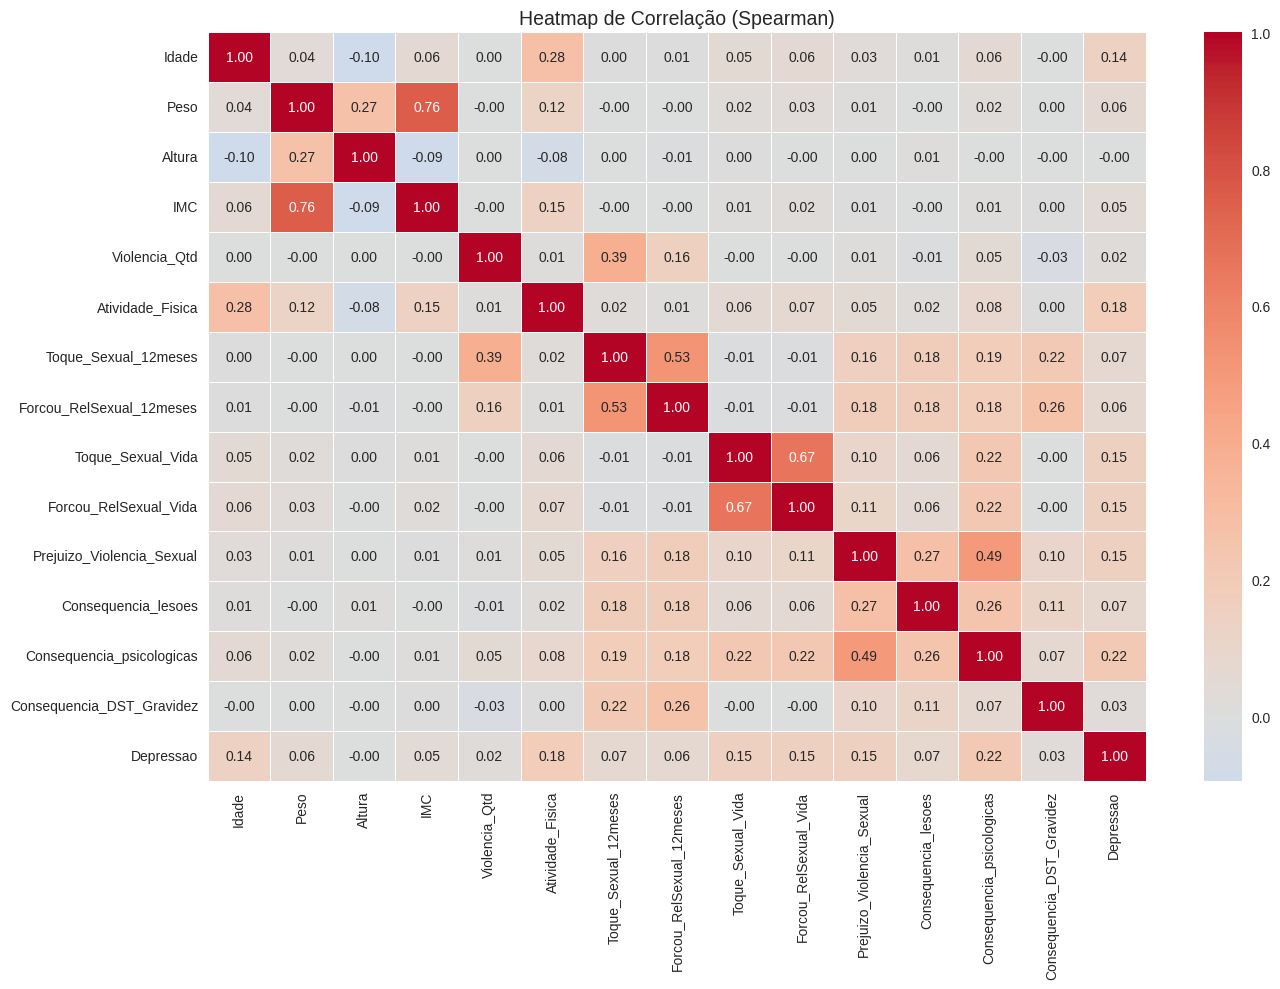

In [47]:
variaveis_numericas = [
    "Idade",
    "Peso",
    "Altura",
    "IMC",
    "Violencia_Qtd",
    "Atividade_Fisica",
    "Toque_Sexual_12meses",
    "Forcou_RelSexual_12meses",
    "Toque_Sexual_Vida",
    "Forcou_RelSexual_Vida",
    "Prejuizo_Violencia_Sexual",
    "Consequencia_lesoes",
    "Consequencia_psicologicas",
    "Consequencia_DST_Gravidez",
    "Depressao"
]

df_corr = df[variaveis_numericas].copy()

corr = df_corr.corr(method="spearman")

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Heatmap de Correlação (Spearman)", fontsize=14)
plt.tight_layout()
plt.show()

#Interpretação rápida
#Correlação > 0.3 → associação moderada
#Correlação > 0.6 → associação forte (atenção à colinearidade)
#Sinal positivo → cresce junto
#Sinal negativo → efeito inverso